# FIN 514 - PS4 Q3 LR
**Spring 2022**



In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [14]:
# input parameters

start_step = 5
N = 100
S0 = 100.0
K = 100.0
B = 95
r = 0.1
q = 0
sigma = 0.3
T = 0.2 

## Binomial Model Function

In [15]:

def LR_DB_fun(S0, K, B, T, r, sigma, start_step, N):

    # LIST TO SAVE RESULTS
    lr_result = []
        
    # CREATE ARRAY OF SIZE [N+1] TO STORE ALL STEPS
    option_value = np.zeros([10*N+1])
    stock_value = np.zeros([10*N+1])  
    
        
    # FOR LOOP STATEMENT: For a Binomial Tree from start_step to N
    for n1 in range(start_step, N+1,1):
        
        n = n1*10
        j1 = n1*2
        j2 = n1*4
        j3 = n1*6
        j4 = n1*8        
        
        delta = T / n
        d1 = (np.log(S0 / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        d2 = (np.log(S0 / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        qu = 0.5 + np.sqrt(0.25-0.25*np.exp(-(d2/(n+1/3))**2*(n+1/6)))
        if d2 < 0: 
            qu = 0.5 - np.sqrt(0.25-0.25*np.exp(-(d2/(n+1/3))**2*(n+1/6)))
        qd = 1 - qu    
        qstar = 0.5 + np.sqrt(0.25-0.25*np.exp(-(d1/(n+1/3))**2*(n+1/6)))
        if d1 < 0: 
            qstar = 0.5 - np.sqrt(0.25-0.25*np.exp(-(d1/(n+1/3))**2*(n+1/6)))
        u = np.exp((r-q)*delta)*qstar/qu
        d = (np.exp((r-q)*delta)-qu*u)/(1-qu)
        
        
        
    # CALCULATE OPTION VALUES AT CERTAIN STEPS AND POSITIONS WITHIN THE BINOMIAL TREE:

        j = n 
        
        
        for i in range(0, j):    
            stock_value[i] = S0 * (u**i) * (d**(j - i))
            option_value[i] = np.maximum(stock_value[i]-K, 0)
            
            if stock_value[i] < B:
                sd = stock_value[i]
        
        lamda = (sd*u*u - B)/(sd*u*u - sd)

        for j in range(n-1, -1, -1):
            for i in range(0, j+1):
                stock_value[i] = S0 * (u**i) * (d**(j - i))
                pv = np.exp(-r * delta) * (qu * option_value[i + 1] + qd * option_value[i])
                option_value[i] = pv

                if (j == j1 or j == j2 or j == j3 or j == j4):
                    if stock_value[i] < B:
                            option_value[i] = 0

        
    # RELAY OUTPUTS TO DICTIONARY
        output = {'num_steps': n, 'LR': option_value[0], 'lambda': lamda}
        lr_result.append(output)

    return lr_result


In [16]:
lr = LR_DB_fun(S0, K, B, T, r, sigma, start_step, N)

In [17]:
exact = 5.6711051343

In [18]:
df = pd.DataFrame.from_dict(lr)
df['error_LR'] = df["LR"] - exact
df.to_csv("PS4_Q3", index=False)
df

,num_steps,LR,lambda,error_LR
0,50,5.763879,0.368047,0.092774
1,60,5.678316,0.495916,0.007211
2,70,5.603877,0.613212,-0.067228
3,80,5.538694,0.722188,-0.132411
4,90,5.481154,0.824396,-0.189951
...,...,...,...,...
91,960,5.596286,0.925846,-0.074819
92,970,5.591073,0.956482,-0.080032
93,980,5.585914,0.986954,-0.085191
94,990,5.748214,0.017414,0.077109


### Binomial Model Error Rate

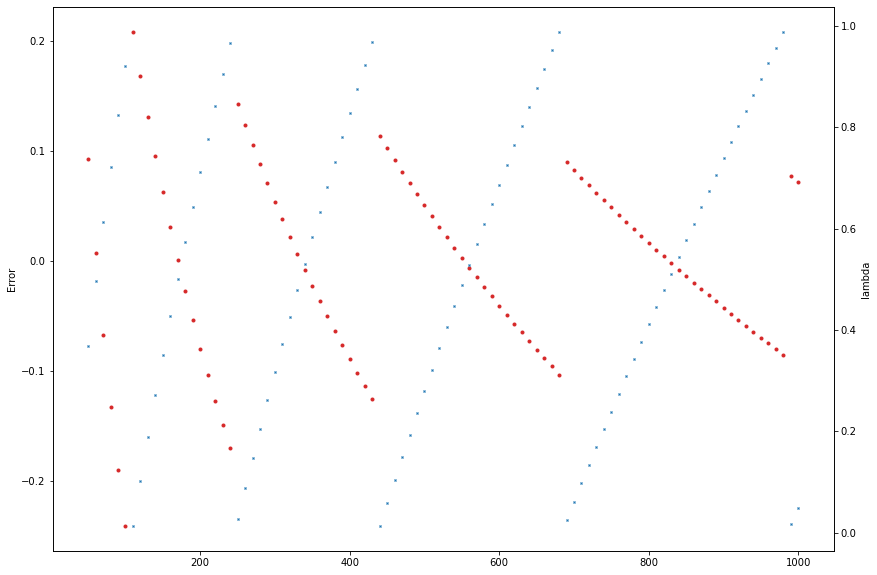

In [20]:
fig, ax1 = plt.subplots(figsize=(14,10))
ax1.set_ylabel('Error')
ax1.plot(df['num_steps'], df['error_LR'], 'o', markersize=3, color = 'tab:red')
ax2 = ax1.twinx()
ax2.set_ylabel('lambda')
ax2.plot(df['num_steps'], df['lambda'], 'x', markersize=2, color = 'tab:blue')
plt.savefig('PS4_Q3_lr.png')
plt.show()

### It can be observed from the above figure that the error is minimum around lambda = 0.5; and thus the tree generating more accurate values